# -Image Transformation on baboon.png (RGB)

#### Objective:
Pixel Transforms are operations you perform one pixel at a time. In this task, you will start by creating histograms. Histograms display the intensity of the image and can be used to optimize image characteristics. You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness.

1. Create and display histograms for each RGB channel.
2. Apply intensity transformations to enhance contrast and brightness.
3. Perform histogram equalization on each channel.
4. Convert the image to grayscale and analyze its histogram.
5. Use Otsu's thresholding for segmentation.
6. Display original and transformed images side-by-side with histograms.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to show two images side by side
def plot_image_pair(img1, img2, name1="Original", name2="Updated Image"):
    plt.figure(figsize=(10, 10))
    
    # First image
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap="gray" if img1.ndim == 2 else None)
    plt.title(name1)
    plt.axis("off")
    
    # Second image
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray" if img2.ndim == 2 else None)
    plt.title(name2)
    plt.axis("off")
    
    plt.show()


#### 🖼️ Load the RGB Image baboon.png

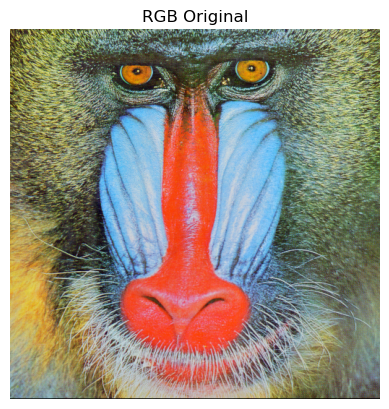

In [3]:
# Load image and convert to RGB for correct color representation
img_bgr = cv2.imread("baboon.png")  # OpenCV loads images in BGR
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("RGB Original")
plt.axis('off')
plt.show()


#### 📊 Display Histograms for Each RGB Channel

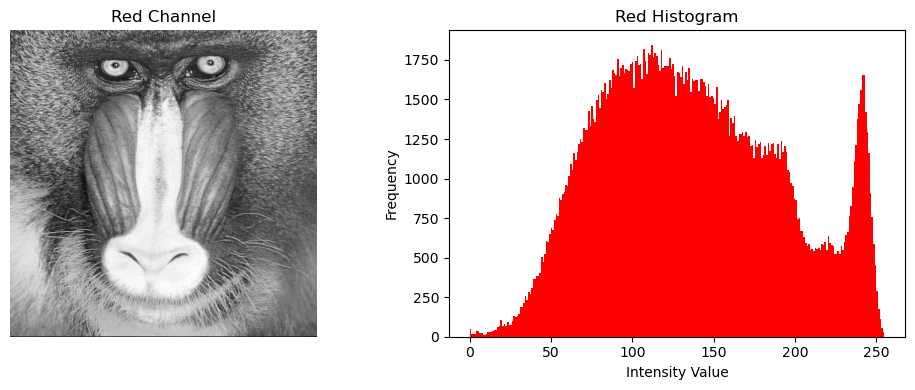

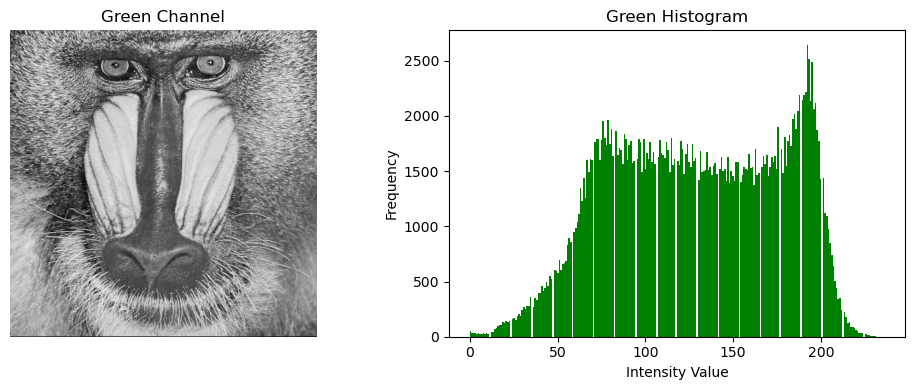

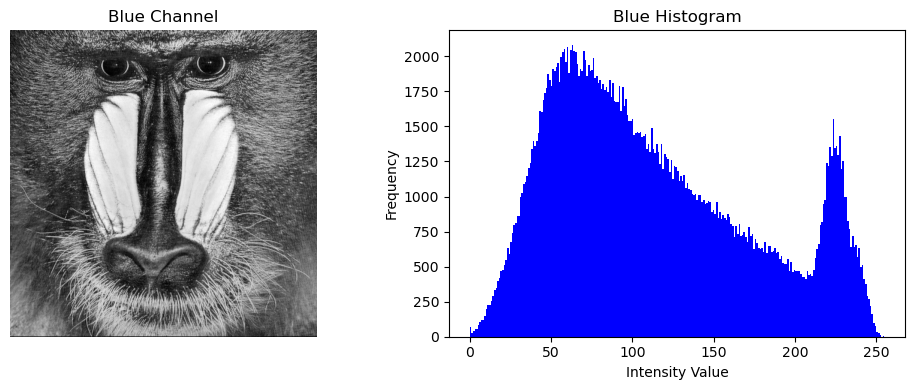

In [4]:
# Display each RGB channel and its histogram
rgb_labels = ['Red', 'Green', 'Blue']
for idx, col in enumerate(rgb_labels):
    plt.figure(figsize=(10, 4))
    
    # Show channel image
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb[:, :, idx], cmap='gray')
    plt.title(f'{col} Channel')
    plt.axis('off')
    
    # Show histogram
    plt.subplot(1, 2, 2)
    plt.hist(img_rgb[:, :, idx].ravel(), bins=256, color=col.lower())
    plt.title(f'{col} Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


#### ✨ Apply Brightness and Contrast Transformation

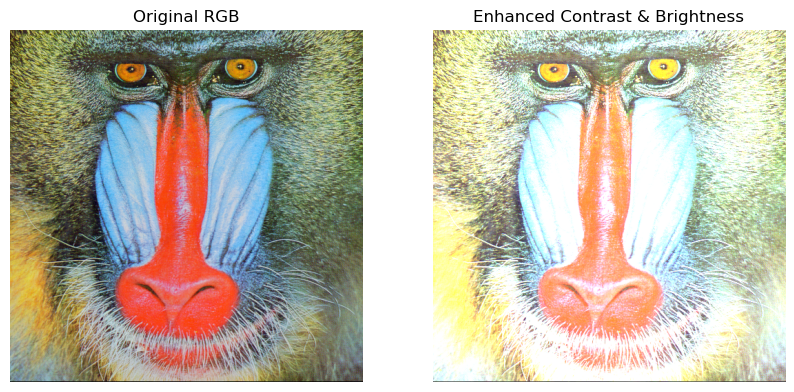

In [5]:
# Brightness and contrast adjustment
contrast_val = 1.5   # Contrast factor
brightness_val = 50  # Brightness offset

# Apply scaling and shifting
img_adjusted = cv2.convertScaleAbs(img_rgb, alpha=contrast_val, beta=brightness_val)

# Display before and after
plot_image_pair(img_rgb, img_adjusted, "Original RGB", "Enhanced Contrast & Brightness")


#### 📈 Histogram Equalization per Channel

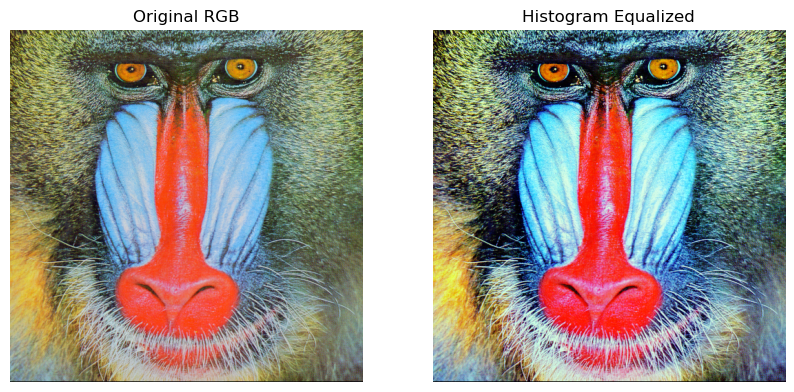

In [6]:
# Equalize each RGB channel individually
eq_channels = []
for ch in range(3):
    ch_eq = cv2.equalizeHist(img_rgb[:, :, ch])
    eq_channels.append(ch_eq)

# Merge equalized channels back into an image
img_equalized = cv2.merge(eq_channels)

# Show original vs equalized
plot_image_pair(img_rgb, img_equalized, "Original RGB", "Histogram Equalized")


#### 🧮 Compare Histograms Before and After Equalization

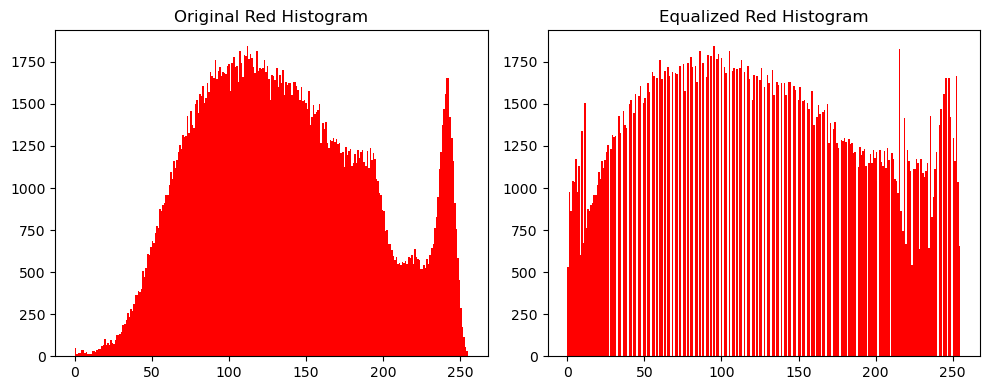

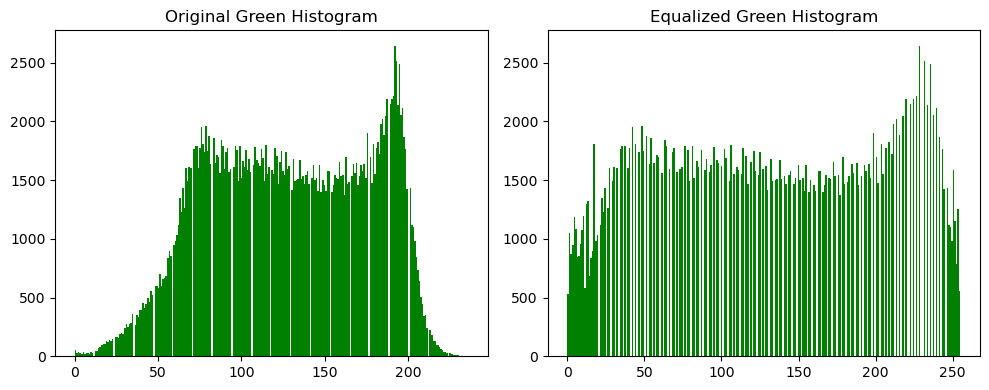

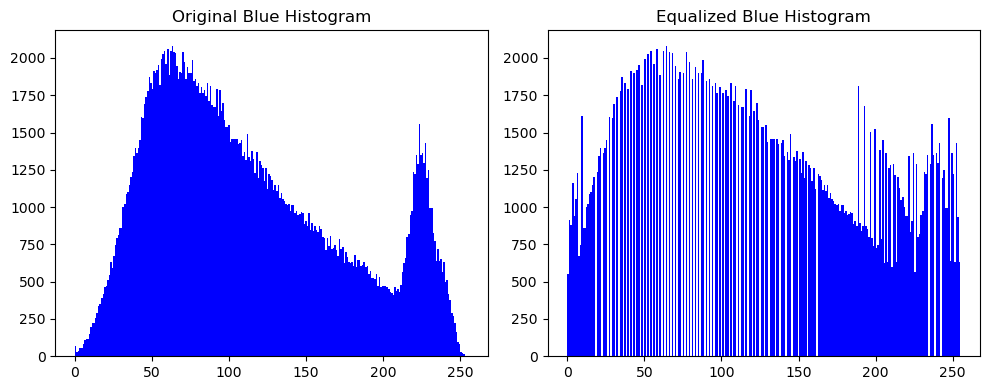

In [9]:
# Compare original and equalized histograms for each RGB channel
for idx, col in enumerate(rgb_labels):
    plt.figure(figsize=(10, 4))
    
    # Original histogram
    plt.subplot(1, 2, 1)
    plt.hist(img_rgb[:, :, idx].ravel(), bins=256, color=col.lower())
    plt.title(f'Original {col} Histogram')
    
    # Equalized histogram
    plt.subplot(1, 2, 2)
    plt.hist(eq_channels[idx].ravel(), bins=256, color=col.lower())
    plt.title(f'Equalized {col} Histogram')
    
    plt.tight_layout()
    plt.show()


#### 🧾 Convert to Grayscale and Show Histogram

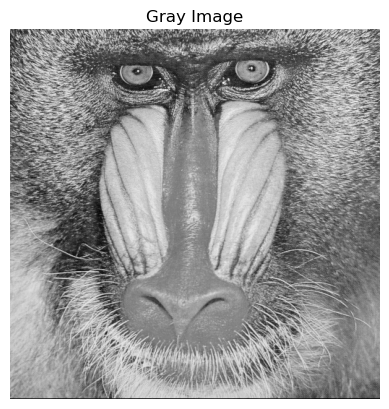

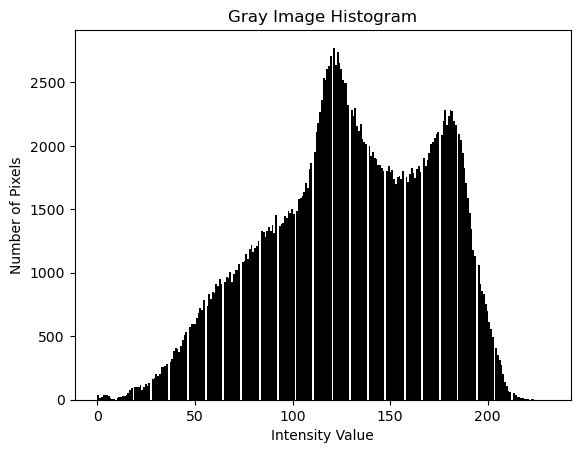

In [10]:
# Convert the image to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.imshow(img_gray, cmap='gray')
plt.title("Gray Image")
plt.axis('off')
plt.show()

# Display grayscale histogram
plt.hist(img_gray.ravel(), bins=256, color='black')
plt.title("Gray Image Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Number of Pixels")
plt.show()


#### 🔳 Thresholding

In [11]:
def apply_threshold(img_gray, th_value, high_val, low_val):
    rows, cols = img_gray.shape
    out_img = np.zeros((rows, cols), dtype=np.uint8)
    
    for r in range(rows):
        for c in range(cols):
            if img_gray[r, c] > th_value:
                out_img[r, c] = high_val
            else:
                out_img[r, c] = low_val
                
    return out_img

In [12]:
# Threshold parameters
th_val = 1
high_val = 255
low_val = 0

# Apply thresholding
th_img = apply_threshold(img_gray, th_val, high_val, low_val)
th_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)